In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# For visualizations we will use ggplot stlye and Century Gothic as font family
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Century Gothic' 

## 1. Data Preprocessing

In [2]:
# Read the dataset
faults_df = pd.read_csv('./Datasets/classData.csv')
faults_df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [3]:
# Columns information
faults_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [4]:
# Check if there are missing values
faults_df.isnull().sum()

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

In [5]:
# Create Fault type column to classify fault types
faults_df['Fault type'] = faults_df['G'].astype(str) + faults_df['C'].astype(str) + faults_df['B'].astype(str) + faults_df['A'].astype(str)
faults_df_copy = faults_df.copy()
faults_df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [6]:
# Categorize each type of fault 
faults_df.loc[faults_df['Fault type'] == '0000', ['Fault type']] = 'No Fault'
faults_df.loc[faults_df['Fault type'] == '1001', ['Fault type']] = 'L-G Fault'
faults_df.loc[faults_df['Fault type'] == '1011', ['Fault type']] = 'LL-G Fault'
faults_df.loc[faults_df['Fault type'] == '0110', ['Fault type']] = 'LL Fault'
faults_df.loc[faults_df['Fault type'] == '0111', ['Fault type']] = 'LLL Fault'
faults_df.loc[faults_df['Fault type'] == '1111', ['Fault type']] = 'LLL-G Fault'

In [7]:
# Count the different type of faults measures (instances)
faults_df['Fault type'].value_counts()

Fault type
No Fault       2365
LL-G Fault     1134
LLL-G Fault    1133
L-G Fault      1129
LLL Fault      1096
LL Fault       1004
Name: count, dtype: int64

## 2. Data Visualization

#### a) Fault types visualization

<Axes: xlabel='Fault type', ylabel='# of Measures'>

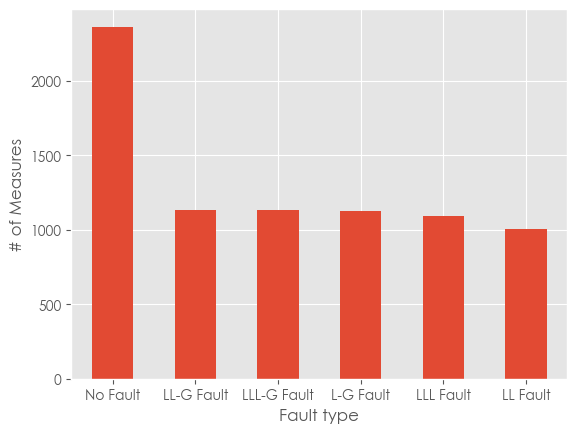

In [8]:
faults_df['Fault type'].value_counts().plot(
    kind='bar',
    ylabel='# of Measures',
    rot=0)

#### b) Current vs Voltage visualization at different fault scenarios

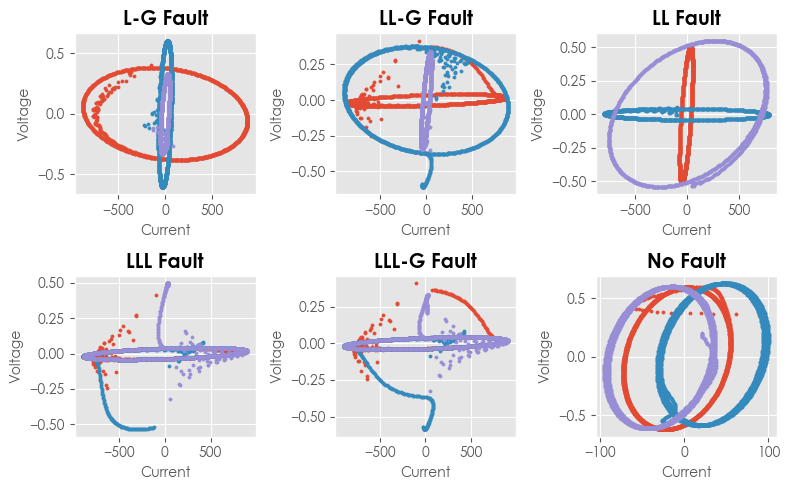

In [9]:
# Plot current vs voltage at different type of fault condition
fault_types = faults_df['Fault type'].unique().tolist()

df_currents = faults_df.iloc[:, 4:7]
df_voltages = faults_df.iloc[:, 7:10]

fig, axs = plt.subplots(2, 3, figsize=(8, 5))
axs = axs.flatten()

for i in range(len(fault_types)):
    for j in range(len(df_currents.columns)):
        current = faults_df.loc[faults_df['Fault type'] == fault_types[i], df_currents.columns[j]]
        voltage = faults_df.loc[faults_df['Fault type'] == fault_types[i], df_voltages.columns[j]]
        axs[i].scatter(current, voltage, s=5)
        axs[i].set_title(fault_types[i], fontweight='bold')
        axs[i].set_xlabel('Current', fontsize=10)
        axs[i].set_ylabel('Voltage', fontsize=10)

plt.tight_layout()
plt.show()

#### c) Current and Voltage visualization at different fault scenarios

In [10]:
# Build a function that plots current and voltage
def current_voltage_plot(fault_type):
    fig, axs = plt.subplots(2, 1, figsize=(15, 6))
    axs = axs.flatten()

    # Plot title
    fig.suptitle(fault_type, fontsize=16, fontweight='bold')

    # Plots current and voltage in different fault scenarios
    for i in range(len(df_currents.columns)):
        current = faults_df.loc[faults_df['Fault type'] == fault_type, df_currents.columns[i]]
        voltage = faults_df.loc[faults_df['Fault type'] == fault_type, df_voltages.columns[i]]
        
        # Plot current
        axs[0].plot(current, label=df_currents.columns[i])
        axs[0].set_ylabel('Current')
        axs[0].legend()
        
        # Plot voltage
        axs[1].plot(voltage, label=df_voltages.columns[i])
        axs[1].set_ylabel('Voltage')
        axs[1].legend()
    
    # Show visualization
    plt.tight_layout()
    plt.legend()
    plt.show()

In [11]:
# 1. No fault scenario
faults_df[faults_df['Fault type'] == 'No Fault'].describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,2365.0,2365.0,2365.0,2365.0,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000
mean,0.0,0.0,0.0,0.0,-7.559426,33.777881,-29.297992,-0.018960,0.028809,-0.009848
std,0.0,0.0,0.0,0.0,45.265969,45.154047,44.643786,0.428869,0.425476,0.430238
min,0.0,0.0,0.0,0.0,-72.668050,-32.449628,-94.623578,-0.620748,-0.587445,-0.612709
25%,0.0,0.0,0.0,0.0,-53.353433,-12.002179,-73.704546,-0.446612,-0.393912,-0.438947
50%,0.0,0.0,0.0,0.0,-6.603287,34.889698,-29.840959,-0.026872,0.032044,-0.012438
75%,0.0,0.0,0.0,0.0,38.075608,78.843320,14.998285,0.410841,0.453700,0.425912
max,0.0,0.0,0.0,0.0,61.806321,100.247141,37.717351,0.595342,0.627875,0.600179


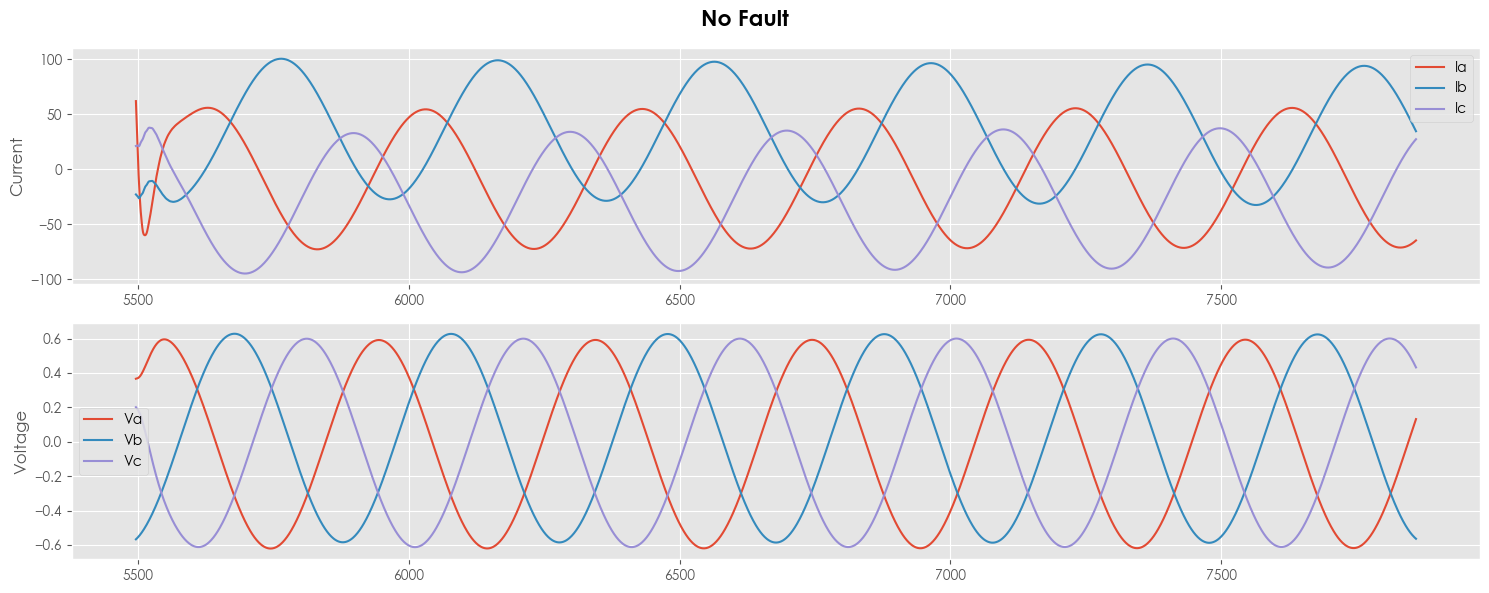

In [12]:
current_voltage_plot('No Fault')

During a three-phase no-fault scenario, the voltage and current waves exhibit a symmetrical, sinusoidal pattern with a 120-degree phase shift between each phase. This balanced condition is fundamental for the efficient and stable operation of three-phase power systems.

In [13]:
# 2. Line - Ground fault scenario
faults_df[faults_df['Fault type'] == 'L-G Fault'].describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,1129.0,1129.0,1129.0,1129.0,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,1.0,0.0,0.0,1.0,35.626301,3.188151,-3.360933,-0.021151,0.025602,-0.004451
std,0.0,0.0,0.0,0.0,616.329665,50.868240,35.500693,0.264528,0.427844,0.239084
min,1.0,0.0,0.0,1.0,-877.825544,-224.159427,-132.282815,-0.382739,-0.605916,-0.335990
25%,1.0,0.0,0.0,1.0,-593.941905,-41.260410,-37.615767,-0.281427,-0.401282,-0.247577
50%,1.0,0.0,0.0,1.0,76.667686,6.235626,-6.502734,-0.032482,0.056248,-0.011268
75%,1.0,0.0,0.0,1.0,648.572016,52.067662,31.025126,0.232641,0.447631,0.242816
max,1.0,0.0,0.0,1.0,879.342097,70.788089,85.800162,0.400750,0.605916,0.329136


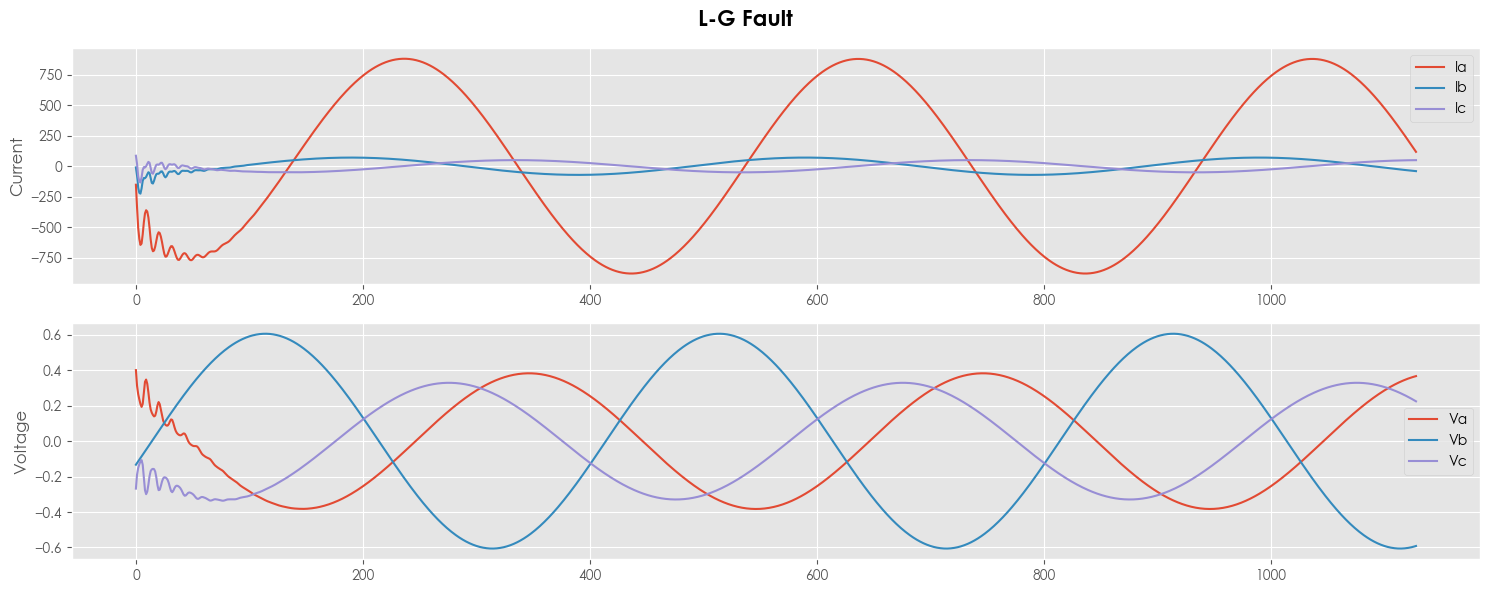

In [14]:
current_voltage_plot('L-G Fault')

During a fault where a line makes contact with the ground, the voltage and current waves may become asymmetrical. Unbalanced currents may flow. In this case Line A increases from 50A to 750A aproximately. 

In [15]:
# 3. Line - Line fault scenario
faults_df[faults_df['Fault type'] == 'LL Fault'].describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,1004.0,1004.0,1004.0,1004.0,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,0.0,1.0,1.0,0.0,-1.587148,-102.565061,106.674246,-0.014606,0.000412,0.014195
std,0.0,0.0,0.0,0.0,44.518645,546.033642,524.798227,0.358125,0.029403,0.385324
min,0.0,1.0,1.0,0.0,-70.035681,-792.181223,-746.179774,-0.508612,-0.042448,-0.540869
25%,0.0,1.0,1.0,0.0,-44.998756,-623.480814,-408.813161,-0.373324,-0.028732,-0.369126
50%,0.0,1.0,1.0,0.0,1.945656,-219.312148,213.977665,-0.020152,0.001346,0.020627
75%,0.0,1.0,1.0,0.0,43.537699,437.716574,605.745534,0.341936,0.028325,0.400398
max,0.0,1.0,1.0,0.0,56.947217,785.086984,770.168143,0.518491,0.054319,0.548095


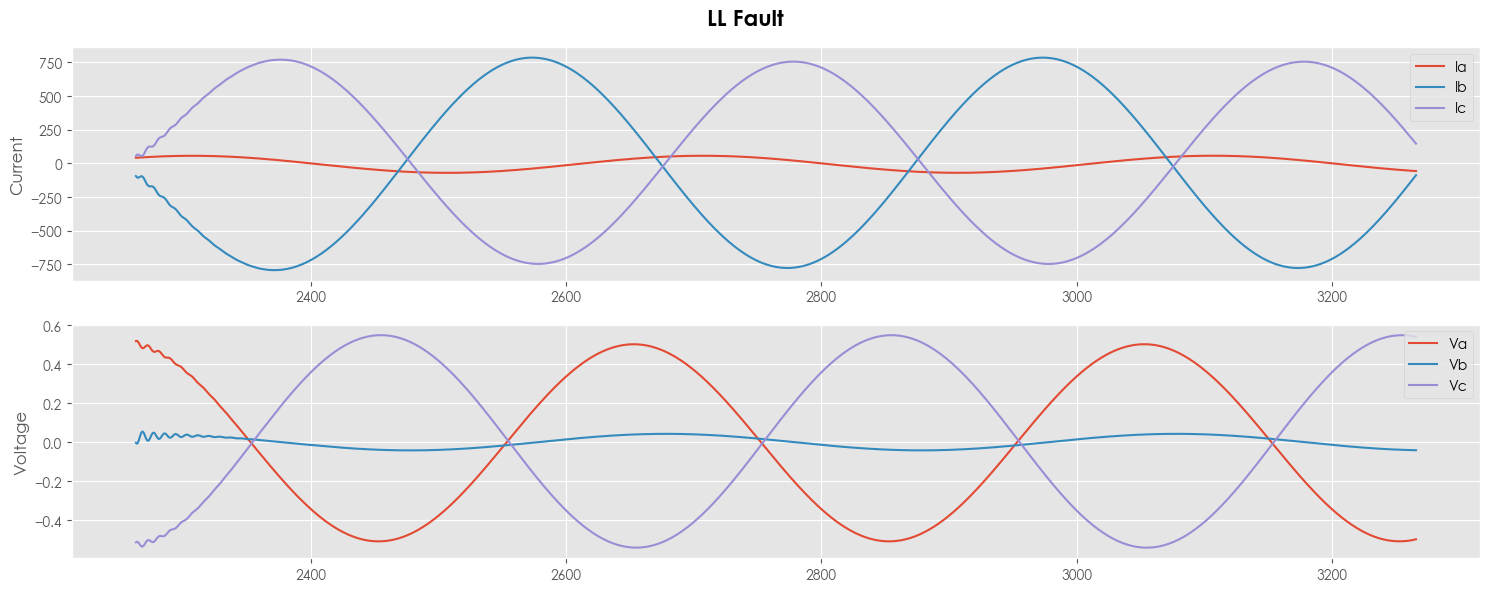

In [16]:
current_voltage_plot('LL Fault')

In a fault between two lines, the system experiences an imbalance. This can result in distorted voltage and current waveforms, disrupting the symmetrical nature of the three-phase system. Both, line B and line C increased about 15 times their nominal current value.

In [17]:
# 4. Line - Line - Ground fault scenario
faults_df[faults_df['Fault type'] == 'LL-G Fault'].describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,1134.0,1134.0,1134.0,1134.0,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000
mean,1.0,0.0,1.0,1.0,35.926002,-93.010838,-3.188977,0.011372,-0.007274,-0.004099
std,0.0,0.0,0.0,0.0,610.722486,589.578190,39.746238,0.073204,0.288936,0.244915
min,1.0,0.0,1.0,1.0,-871.234358,-900.526951,-57.782595,-0.248609,-0.608016,-0.350491
25%,1.0,0.0,1.0,1.0,-582.273544,-660.242866,-42.536864,-0.031712,-0.283041,-0.253632
50%,1.0,0.0,1.0,1.0,79.129409,-96.697219,-5.318930,-0.001335,0.013648,-0.010634
75%,1.0,0.0,1.0,1.0,642.760900,405.494131,35.458591,0.031206,0.277132,0.248333
max,1.0,0.0,1.0,1.0,872.611973,889.868884,57.782565,0.416930,0.377573,0.338184


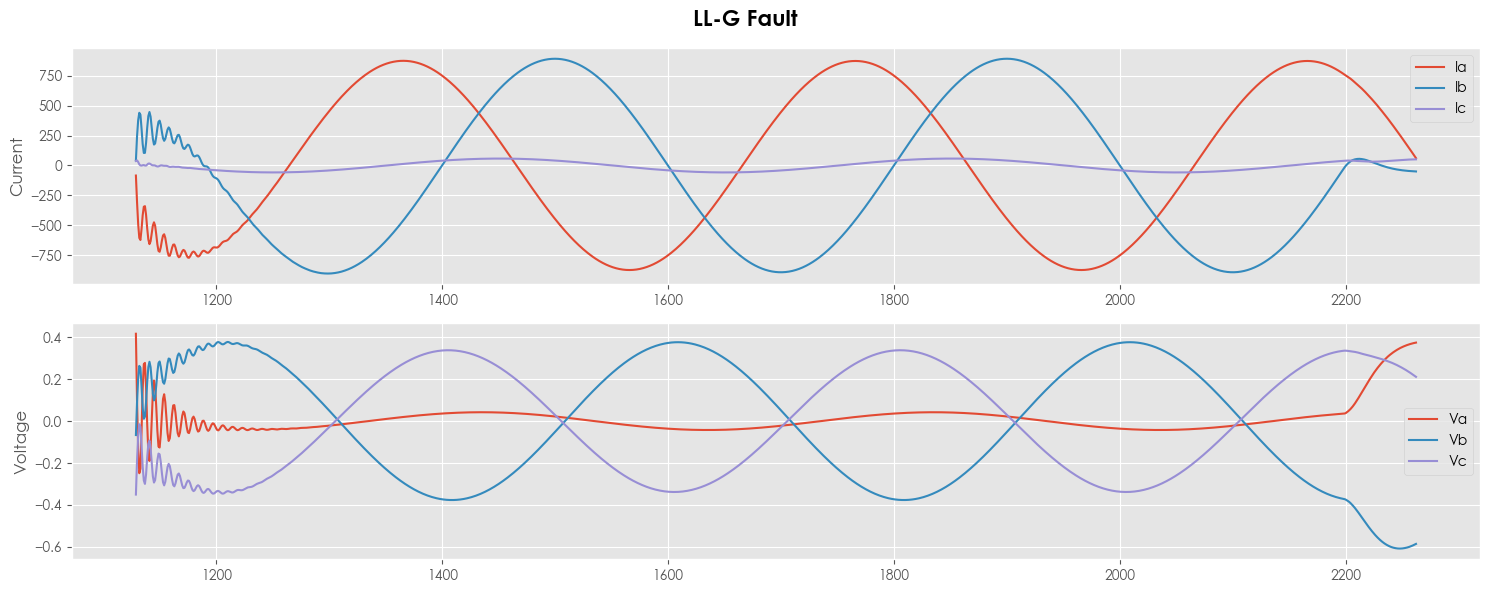

In [18]:
current_voltage_plot('LL-G Fault')

This scenario involves a combination of line-to-line and line-to-ground faults. The system experiences more complexity, potentially leading to further asymmetry in the voltage and current waves.

In [19]:
# 5. Line - Line - Line fault scenario
faults_df[faults_df['Fault type'] == 'LLL Fault'].describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,1096.0,1096.0,1096.0,1096.0,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.0,1.0,1.0,1.0,5.458992,-113.142461,109.772828,-0.001398,-0.031069,0.032468
std,0.0,0.0,0.0,0.0,606.880540,601.699785,592.237466,0.039720,0.122008,0.115415
min,0.0,1.0,1.0,1.0,-882.866352,-893.253346,-882.748900,-0.245984,-0.537216,-0.320781
25%,0.0,1.0,1.0,1.0,-607.044127,-688.174965,-418.216190,-0.032214,-0.033163,-0.024183
50%,0.0,1.0,1.0,1.0,32.140509,-207.893378,146.916670,-0.003966,-0.002517,0.011807
75%,0.0,1.0,1.0,1.0,597.671468,418.813642,676.646104,0.028516,0.027734,0.038001
max,0.0,1.0,1.0,1.0,885.738571,884.095418,901.274261,0.412305,0.084683,0.498858


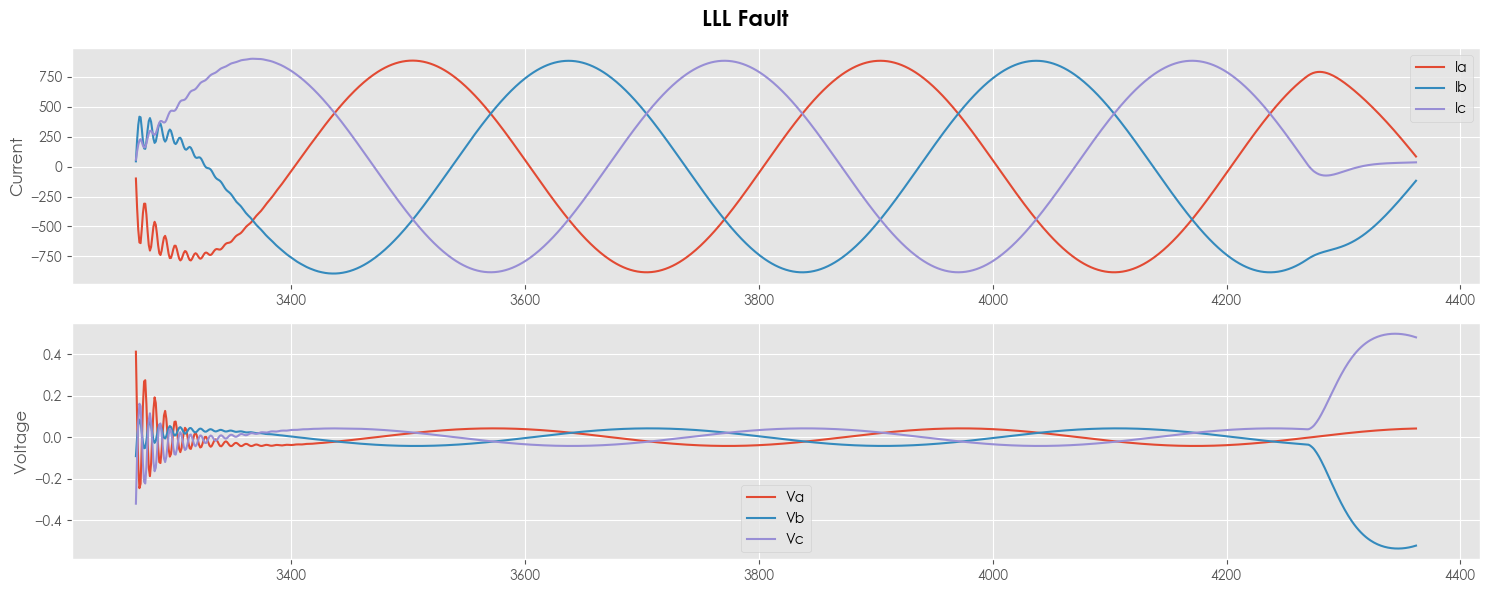

In [20]:
current_voltage_plot('LLL Fault')

A fault involving all three lines introduces significant asymmetry. The voltage and current waves may exhibit distorted shapes, and the phase relationship could deviate from the standard 120-degree shift. Current in the 3 phases increased 15 times their nominal current value, whereas voltage collapses.

In [21]:
# 6. Line - Line - Line - Ground fault scenario
faults_df[faults_df['Fault type'] == 'LLL-G Fault'].describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,1133.0,1133.0,1133.0,1133.0,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000
mean,1.0,1.0,1.0,1.0,35.647495,-91.402486,105.602113,0.010372,-0.040683,0.030311
std,0.0,0.0,0.0,0.0,618.770185,586.072925,582.605194,0.070352,0.133954,0.090473
min,1.0,1.0,1.0,1.0,-883.542316,-893.919920,-883.357762,-0.244709,-0.587594,-0.323145
25%,1.0,1.0,1.0,1.0,-592.278131,-658.146456,-393.988469,-0.031772,-0.035212,-0.022872
50%,1.0,1.0,1.0,1.0,80.234673,-98.690428,103.252016,-0.001396,-0.004874,0.013875
75%,1.0,1.0,1.0,1.0,651.450798,399.559933,658.914169,0.030910,0.027115,0.039206
max,1.0,1.0,1.0,1.0,885.024943,883.343053,900.082127,0.410059,0.082066,0.330434


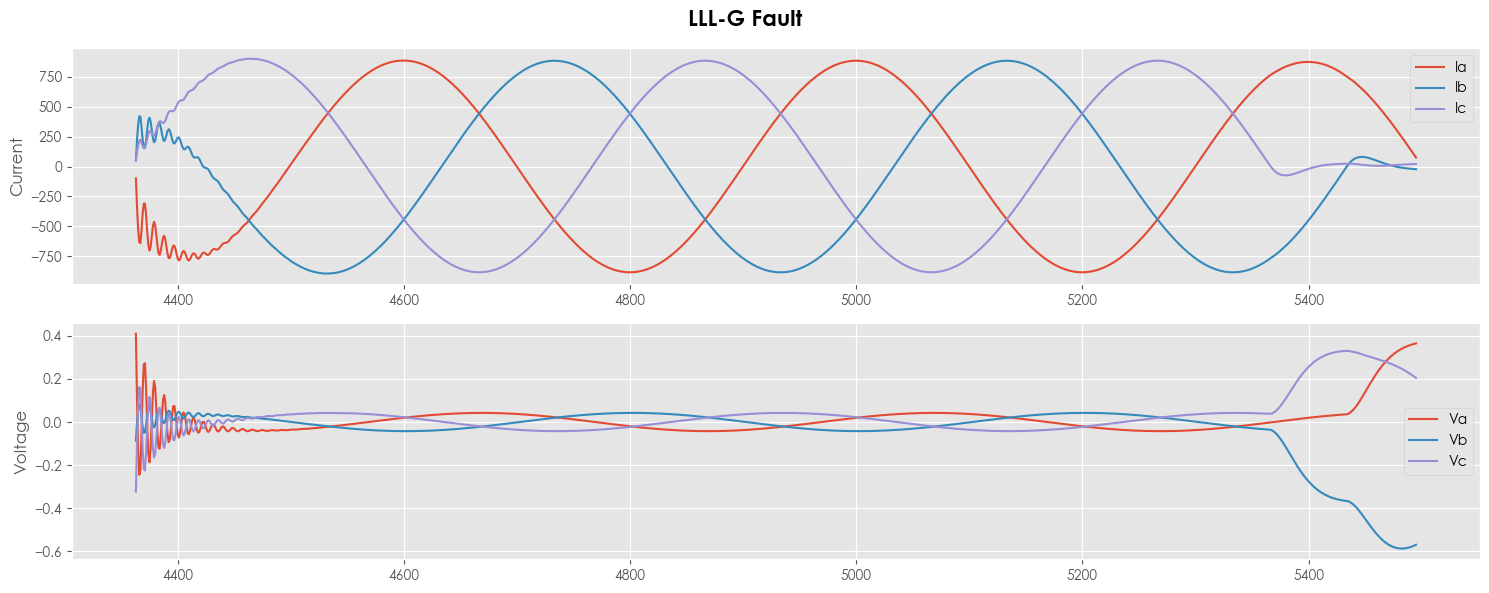

In [22]:
current_voltage_plot('LLL-G Fault')

This scenario is the most complex to happen and also less common in real life (less than 2% of electric systems faults). We can see it looks very similar to the previous visualization. Probably when doing the model predictions, the algorithm will get confused between the LLL and LLL-G fault scenario.

## 3. Model Design

### a) Categorical to numeric transformation

In [23]:
# Add a new column to transform fault type categorical data type to numeric
# This is called: Encoding multiclass label. 
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
faults_df['Fault type numeric'] = encoder.fit_transform(faults_df['Fault type'])
faults_df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault type,Fault type numeric
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,L-G Fault,0
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,L-G Fault,0
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,L-G Fault,0
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,L-G Fault,0
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,L-G Fault,0


In [24]:
# Show numeric value asigned to each type of fault
caseA_categories = pd.DataFrame({
    'Fault type': faults_df['Fault type'].unique(),
    'Fault type numeric': encoder.transform(faults_df['Fault type'].unique())
})
caseA_categories

,Fault type,Fault type numeric
0,L-G Fault,0
1,LL-G Fault,2
2,LL Fault,1
3,LLL Fault,3
4,LLL-G Fault,4
5,No Fault,5


#### b) Model creation using 4 different machine learning algorithms

In [25]:
# Import scikit learn libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [26]:
def machine_learning_models(X, y):

    # Train and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

    # Data standardization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Machine Learning Algorithms
    models = {
        'Decision Trees': DecisionTreeClassifier(random_state=9),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=34),
        'SVM': SVC(kernel='rbf', C=100),
        'KNN': KNeighborsClassifier(n_neighbors=8)
    }

    # Create empty list to store metrics
    accuracies = []
    cross_val_accuracies = []
    reports = []

    for algorithm, model in models.items():

        # SVM and KNN need scaled data
        if algorithm in ['Decision Trees', 'Random Forest']:
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            cross_val_accuracies.append(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean())
        else:
            model.fit(X_train_scaled, y_train)
            predictions = model.predict(X_test_scaled)
            cross_val_accuracies.append(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean())

        # Calculate accuracy
        accuracies.append(accuracy_score(y_test, predictions))

        # Classification report
        reports.append(classification_report(y_test, predictions))

    results = {
        'Model': list(models.keys()),
        'Accuracy': accuracies,
        'Cross Validation accuracy': cross_val_accuracies,
        'Report': reports
    }

    return results

In [27]:
def plot_scores(scores):
    
    # Plot models accuracy
    plt.figure(figsize=(6, 4))
    colors= ['#005187', '#4d82bc', '#84b6f4', '#c4dafa']
    plt.bar(scores['Model'], scores['Accuracy'], color=colors)

    # Show percentage labels
    for i, value in enumerate(scores['Accuracy']):
        plt.text(i, value, f'{value*100:.2f}%', ha='center', va='bottom')

    plt.ylabel('Accuracy', fontweight='bold')
    plt.title('Machine learning models comparisson', fontweight='bold')
    plt.show()

## 4. Model Evaluation

#### a) Case 1: Consider original dataset

In [28]:
# Features selection: For this case all current and voltages will be taken into consideration
X = faults_df.iloc[:, 4:10]
# Target vector
y = faults_df['Fault type numeric']

In [29]:
# Retrieve machine learning metrics and build a dataframe with the results
caseA_results = machine_learning_models(X, y)
caseA_scores = pd.DataFrame(caseA_results)
caseA_scores

,Model,Accuracy,Cross Validation accuracy,Report
0,Decision Trees,0.902098,0.862281,precision recall f1-score ...
1,Random Forest,0.895105,0.858623,precision recall f1-score ...
2,SVM,0.861411,0.800415,precision recall f1-score ...
3,KNN,0.849332,0.807256,precision recall f1-score ...


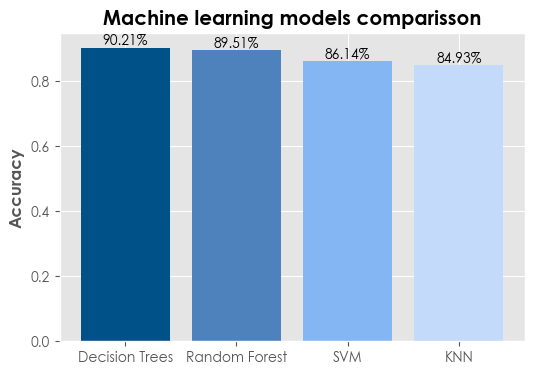

In [30]:
# Plot the different machine learning model accuracies
plot_scores(caseA_scores)

In [31]:
# Visualize and analyze models classification report
for i in range(len(caseA_scores)):
    print(caseA_scores['Model'][i])
    print(caseA_scores['Report'][i])
    print('_____________________')

Decision Trees
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       224
           1       1.00      1.00      1.00       223
           2       0.99      1.00      0.99       227
           3       0.65      0.62      0.63       206
           4       0.65      0.67      0.66       220
           5       1.00      1.00      1.00       473

    accuracy                           0.90      1573
   macro avg       0.88      0.88      0.88      1573
weighted avg       0.90      0.90      0.90      1573

_____________________
Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00       223
           2       0.99      1.00      1.00       227
           3       0.60      0.60      0.60       206
           4       0.63      0.63      0.63       220
           5       1.00      1.00      1.00       473

    accuracy              

Conclusion: Despite achieving commendable accuracy results, our machine learning models encountered challenges distinguishing between type 3 (LLL) and type 4 faults (LLL-G). As highlighted earlier, this difficulty stems from the striking similarity in voltage and current profiles for both fault types.

In response to this observation, we plan to refine our approach by consolidating LLL and LLL-G faults into a single fault category (LLL). This adjustment is motivated not only by the inherent likeness in electrical profiles but also by the real-world prevalence of such faults, which accounts for less than 5% of the total faults in an electrical system. By simplifying the model to treat these closely resembling fault types as one, we expect better results in the predictions.

### Case 2: Consider LLL-G and LLL fault just as LLL Fault

In [32]:
# Use faults_df_copy dataframe to store 0111 and 1111 type faults as LLL Fault
faults_df_copy.loc[faults_df_copy['Fault type'] == '0000', ['Fault type']] = 'No Fault'
faults_df_copy.loc[faults_df_copy['Fault type'] == '1001', ['Fault type']] = 'L-G Fault'
faults_df_copy.loc[faults_df_copy['Fault type'] == '1011', ['Fault type']] = 'LL-G Fault'
faults_df_copy.loc[faults_df_copy['Fault type'] == '0110', ['Fault type']] = 'LL Fault'
faults_df_copy.loc[faults_df_copy['Fault type'] == '0111', ['Fault type']] = 'LLL Fault'
faults_df_copy.loc[faults_df_copy['Fault type'] == '1111', ['Fault type']] = 'LLL Fault'

In [33]:
# Encoding multiclass label
faults_df_copy['Fault type numeric'] = encoder.fit_transform(faults_df_copy['Fault type'])
# Show numeric value asigned to each type of fault
caseB_categories = pd.DataFrame({
    'Fault type': faults_df_copy['Fault type'].unique(),
    'Fault type numeric': encoder.transform(faults_df_copy['Fault type'].unique())
})
caseB_categories

,Fault type,Fault type numeric
0,L-G Fault,0
1,LL-G Fault,2
2,LL Fault,1
3,LLL Fault,3
4,No Fault,4


In [34]:
# Features selection: For this case all current and voltages will be taken into consideration
X1 = faults_df_copy.iloc[:, 4:10]
# Target vector
y1 = faults_df_copy['Fault type numeric']

In [35]:
# Retrieve machine learning metrics and build a dataframe with the results
caseB_results = machine_learning_models(X1, y1)
caseB_scores = pd.DataFrame(caseB_results)
caseB_scores

,Model,Accuracy,Cross Validation accuracy,Report
0,Decision Trees,0.997457,0.994434,precision recall f1-score ...
1,Random Forest,0.999364,0.997297,precision recall f1-score ...
2,SVM,0.998729,0.946406,precision recall f1-score ...
3,KNN,0.987285,0.969468,precision recall f1-score ...


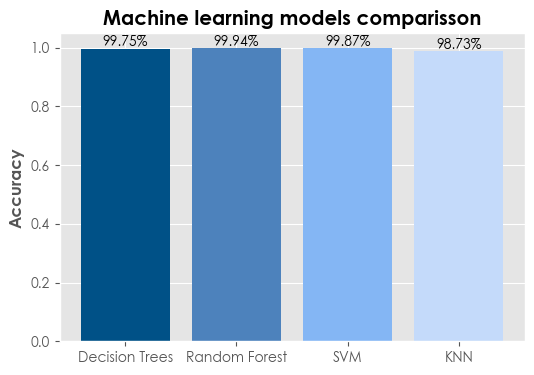

In [36]:
# Plot the different machine learning model accuracies
plot_scores(caseB_scores)

In [37]:
# Visualize and analyze models classification report
for i in range(len(caseB_scores)):
    print(caseB_scores['Model'][i])
    print(caseB_scores['Report'][i])
    print('_____________________')

Decision Trees
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       224
           1       1.00      1.00      1.00       223
           2       1.00      1.00      1.00       227
           3       1.00      1.00      1.00       426
           4       1.00      1.00      1.00       473

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

_____________________
Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00       223
           2       1.00      1.00      1.00       227
           3       1.00      1.00      1.00       426
           4       1.00      1.00      1.00       473

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00   

Conclusion: Our hypothesis has been validated; the machine learning models have shown significant improvement in accuracy, precision and recall, following the implemented modifications. To strengthen this conclusion, we observe also the cross-validation metrics with exceptionally high values.